# Mod 8 CS I

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
"""1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that
collection and write a helper function to plot the image using matplotlib.
[Hint: Explore datasets module from scikit learn"""

#Loading the digits dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
#Creating Features
images = digits.images.reshape(digits.images.shape[0], -1)

#Creating Target variable
labels = digits.target.reshape(digits.images.shape[0], -1)

In [4]:
print(images.shape)
print(labels.shape)

(1797, 64)
(1797, 1)


<Figure size 432x288 with 0 Axes>

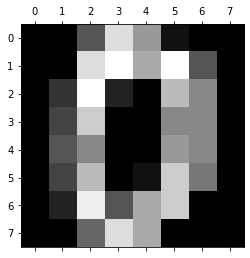

In [5]:
# Let's see how the image looks like
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [6]:
"""2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic
regression model and observe the accuracy"""
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=10)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression as logReg
log_reg = logReg().fit(X_train, y_train)

#Printing coeffs and intercept
print(f"Coeff: {log_reg.coef_}")
print(f"Intercept: {log_reg.intercept_}")


#Predicting the data
y_pred = log_reg.predict(X_test)
logReg_score = accuracy_score(y_pred, y_test)
print(f"Accuracy score of Logistic Regression: {logReg_score}")

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Coeff: [[ 0.00000000e+00  1.10806953e-02 -5.72539256e-02  1.46466114e-01
  -4.22561751e-03 -4.15163468e-01 -2.86452584e-01 -3.67905518e-02
  -2.07626483e-02 -5.83759376e-02 -8.89826164e-02  3.44618828e-01
   1.54090615e-01  1.29518353e-01 -1.35108752e-01 -5.35565589e-02
  -1.71578968e-04  1.59885151e-01  2.72938576e-01 -4.86623311e-02
  -7.28934450e-01  3.63042781e-01  1.58995802e-01 -3.07148625e-02
   0.00000000e+00  2.65591403e-01  2.45134222e-01 -4.07735868e-01
  -1.16293234e+00 -3.35770719e-02  5.29978055e-01 -1.81221524e-03
   0.00000000e+00  4.77113929e-01  2.53965299e-01 -5.56537008e-01
  -9.57457662e-01  8.28733197e-02  2.94487595e-01  0.00000000e+00
  -1.53907908e-03  8.94341883e-02  5.12592287e-01 -1.65686402e-01
  -4.61217166e-01  2.41572764e-01  1.37758440e-01 -7.03245453e-03
  -2.89767361e-03 -8.65271806e-02  2.16968889e-01  9.92795723e-02
   3.86567916e-01  1.27479313e-01 -1.53484324e-01 -1.26299468e-01
  -1.09364178e-04 -3.40974123e-02 -8.80992410e-02  2.48918361e-01
  -

In [9]:
print(f"Confusion matrix: \n{confusion_matrix(y_pred, y_test)}")
print(f"Classification report: \n{classification_report(y_pred, y_test)}")

Confusion matrix: 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  1  0  1  0  0  0]
 [ 0  1 34  1  0  0  0  0  1  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  1  0 32  0  0  1  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  1  0  0  0 31  1]
 [ 0  0  0  0  0  0  0  0  0 37]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.94      0.94        34
           2       1.00      0.92      0.96        37
           3       0.95      1.00      0.97        38
           4       0.94      1.00      0.97        32
           5       1.00      0.91      0.96        35
           6       0.97      1.00      0.99        36
           7       1.00      1.00      1.00        40
           8       0.94      0.91      0.93        34
           9       0.95      1.00      0.97        37

    accuracy                  

In [10]:
"""3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.
[Hint: Refer to decomposition module of scikit learn]"""

# The code below has .95 for the number of components parameter. 
# It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

from sklearn.decomposition import PCA

#Fitting PCA on training set.
pca = PCA(0.95).fit(X_train)

In [11]:
print(pca.n_components_)

39


In [12]:
# You can find out how many components PCA choose after fitting the model using pca.n_components_ . 
# In this case, 95% of the variance amounts to 39 principal components.

[0.12188503 0.09662481 0.08615236 0.06698893 0.04964985 0.04379115
 0.04035625 0.03443362 0.03072738 0.0289177  0.02781844 0.02630695
 0.02292572 0.02213932 0.02041051 0.01863828 0.01763494 0.01647981
 0.01566659 0.01397744 0.01277339 0.01210956 0.01106321 0.01043325
 0.00960998 0.00933155 0.00865913 0.00837582 0.00817756 0.00756277
 0.00730571 0.0067843  0.00659472 0.00611921 0.00556187 0.00520594
 0.00492505 0.00455722 0.00439705]
[0.12188503 0.21850985 0.3046622  0.37165113 0.42130098 0.46509213
 0.50544838 0.539882   0.57060939 0.59952709 0.62734553 0.65365248
 0.6765782  0.69871752 0.71912803 0.73776631 0.75540125 0.77188106
 0.78754765 0.80152509 0.81429848 0.82640804 0.83747125 0.8479045
 0.85751448 0.86684604 0.87550516 0.88388099 0.89205855 0.89962132
 0.90692703 0.91371133 0.92030604 0.92642525 0.93198712 0.93719306
 0.94211811 0.94667533 0.95107238]


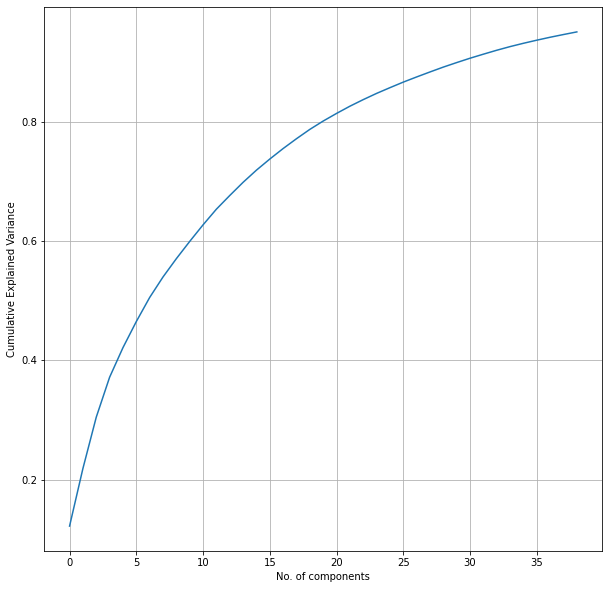

In [13]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()
# As per the graph, for 95% variance, we need almost 29 components.

In [14]:
"""Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.
[Hint: Project both the train and test samples to the new subspace]"""
# Apply the mapping (transform) to both the training set and the test set.

#Transform the data
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression as logReg
log_reg_trnsformed = logReg().fit(X_train, y_train)

#Printing coeffs and intercept
print(f"Coeff: {log_reg_trnsformed.coef_}")
print(f"Intercept: {log_reg_trnsformed.intercept_}")


#Predicting the data
y_pred2 = log_reg_trnsformed.predict(X_test)
logReg2_score = accuracy_score(y_pred2, y_test)
print(f"Accuracy score of Logistic Regression: {logReg2_score}")

In [16]:
"""5. Compute the confusion matrix and count the number of instances that has gone wrong. 
For each of the wrong sample, plot the digit along with predicted and original label"""

print(f"Confusion matrix: \n{confusion_matrix(y_pred2, y_test)}")
print(f"Classification report: \n{classification_report(y_pred2, y_test)}")

Confusion matrix: 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  0  0]
 [ 0  2 34  1  0  0  0  0  1  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  1  0  0]
 [ 0  0  0  1  0 32  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  1  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  1  0  0  0 30  1]
 [ 0  0  0  0  0  0  0  0  1 37]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.97      0.94        32
           2       1.00      0.89      0.94        38
           3       0.95      1.00      0.97        38
           4       0.97      0.97      0.97        34
           5       1.00      0.94      0.97        34
           6       0.97      0.97      0.97        37
           7       0.97      1.00      0.99        39
           8       0.91      0.91      0.91        33
           9       0.95      0.97      0.96        38

    accuracy                  